# California Housing Price Prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
import math
from scipy import stats
from scipy.stats import skew

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
#train.options.display.max_columns = None
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_id = test['Id']

## Skewness of target Feature

<AxesSubplot:xlabel='SalePrice'>

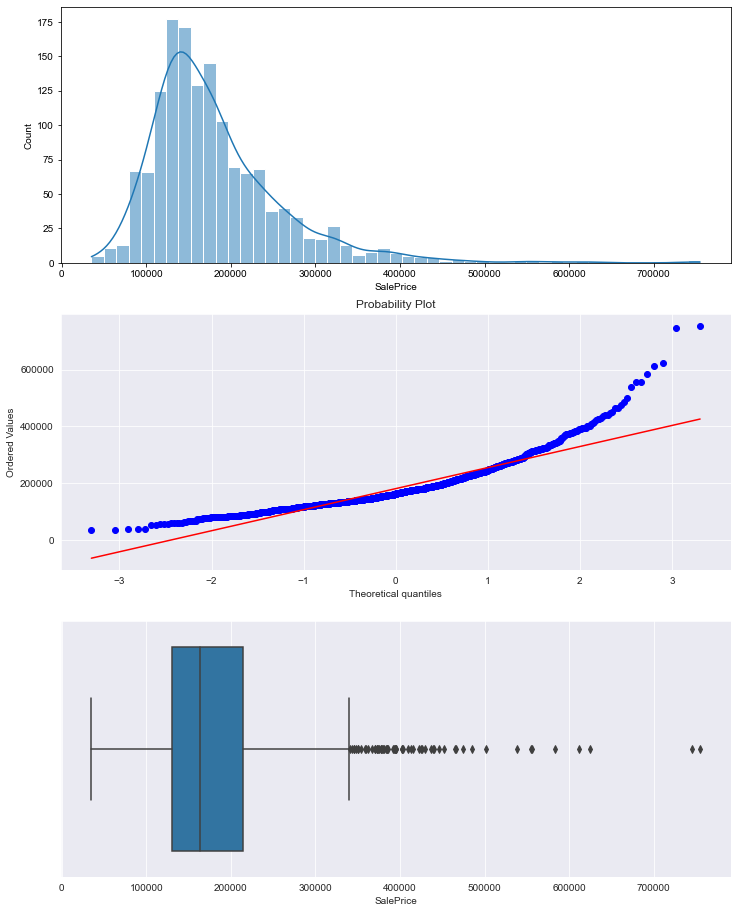

In [8]:
#Checking Skewness

fig=plt.figure(figsize=(12,16))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(train.loc[:, 'SalePrice'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(train.loc[:,'SalePrice'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=train.loc[:, 'SalePrice'],ax=ax3)

In [9]:
#checking skewness

print("Skewness of the SalesPrice is", train['SalePrice'].skew())

Skewness of the SalesPrice is 1.8828757597682129


In [10]:
#train["SalePrice"] = np.log1p(train["SalePrice"])
train['SalePrice']= stats.boxcox(train['SalePrice'])[0]

<AxesSubplot:xlabel='SalePrice'>

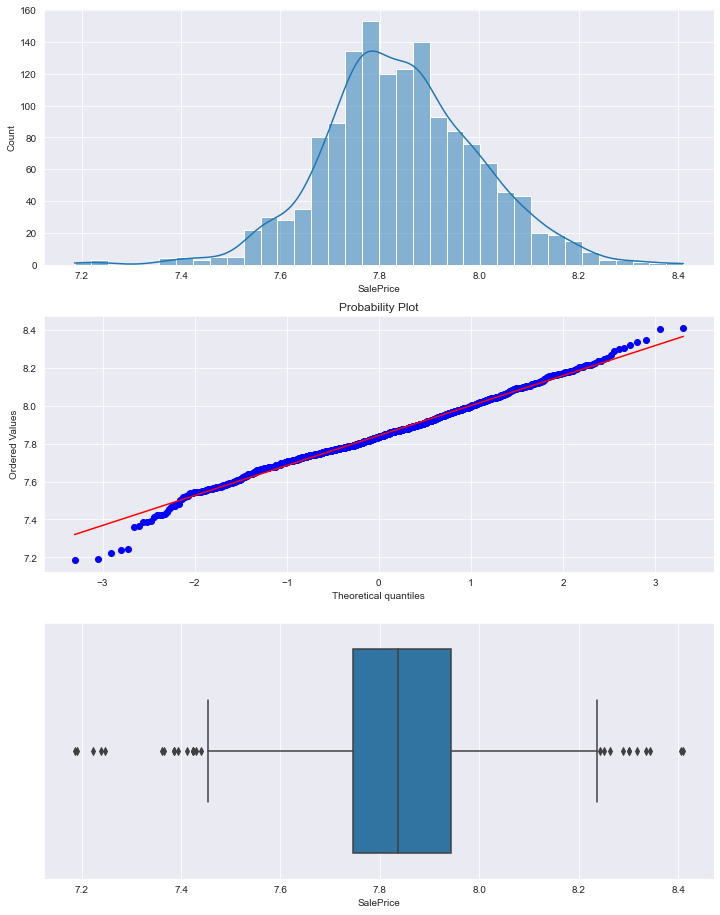

In [11]:
#checking skewness

fig=plt.figure(figsize=(12,16))
fig.tight_layout()

ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(train.loc[:, 'SalePrice'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(train.loc[:,'SalePrice'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=train.loc[:, 'SalePrice'],ax=ax3)

In [12]:
#checking skewness
print("Skewness of the SalesPrice is", train['SalePrice'].skew())

Skewness of the SalesPrice is -0.008652893640830044


In [13]:
train.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,7.932610
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,7.878263
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7.959618
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,7.774955
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8.002875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,7.885783
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,7.942749
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,7.615665
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,7.560548


In [14]:
y = train['SalePrice']

In [15]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
full_data=pd.concat((train,test))
full_data=full_data.drop('Id',axis="columns")

full_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,7.932610
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,7.878263
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7.959618
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,7.774955
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8.002875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


# Corelationship

<AxesSubplot:>

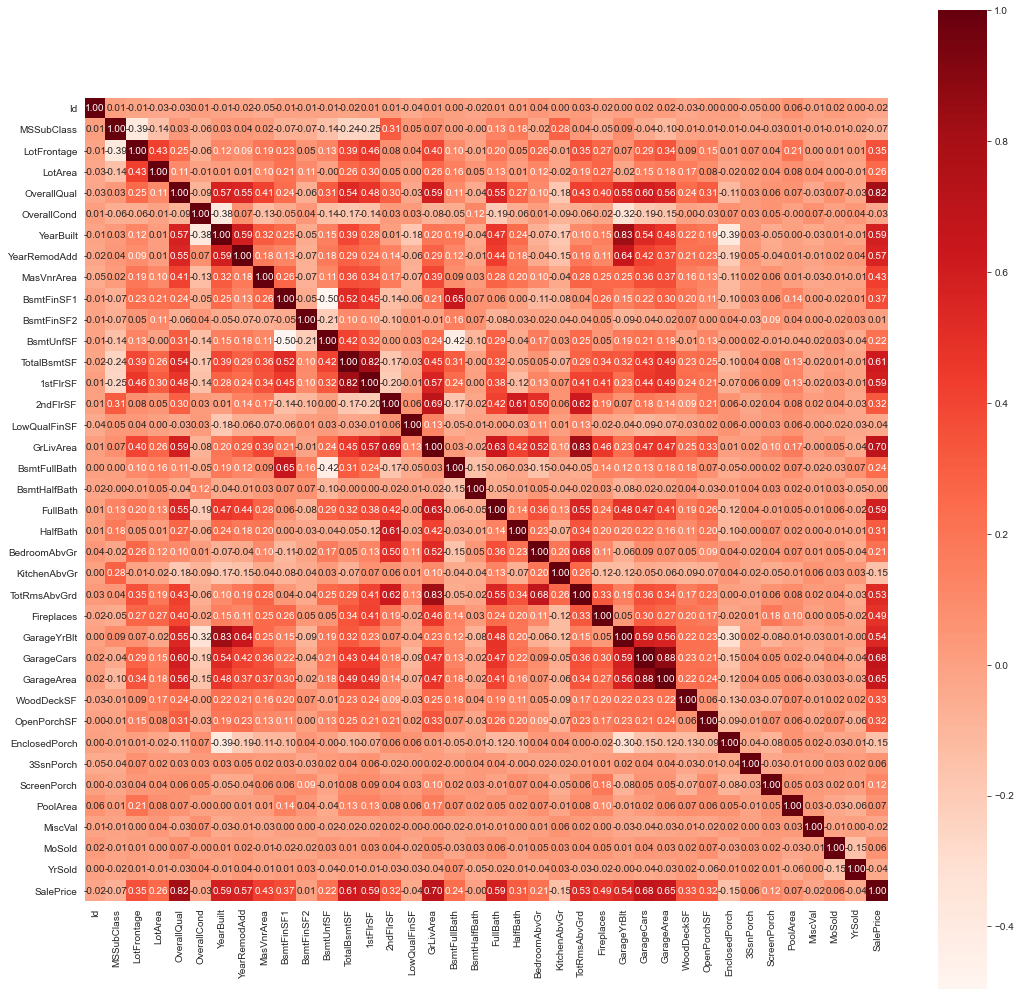

In [18]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot=True,cmap="Reds",fmt='.2f',square=True)

In [19]:
correlation = train.corr()['SalePrice']
correlation

Id              -0.017327
MSSubClass      -0.072481
LotFrontage      0.354339
LotArea          0.255397
OverallQual      0.815044
OverallCond     -0.032282
YearBuilt        0.588037
YearRemodAdd     0.566884
MasVnrArea       0.425364
BsmtFinSF1       0.369564
BsmtFinSF2       0.006244
BsmtUnfSF        0.221045
TotalBsmtSF      0.609149
1stFlrSF         0.593533
2ndFlrSF         0.317707
LowQualFinSF    -0.038494
GrLivArea        0.697018
BsmtFullBath     0.235705
BsmtHalfBath    -0.003649
FullBath         0.594022
HalfBath         0.314675
BedroomAbvGr     0.211745
KitchenAbvGr    -0.147274
TotRmsAbvGrd     0.532020
Fireplaces       0.488518
GarageYrBlt      0.542682
GarageCars       0.680203
GarageArea       0.649638
WoodDeckSF       0.333121
OpenPorchSF      0.318872
EnclosedPorch   -0.149878
3SsnPorch        0.055339
ScreenPorch      0.121459
PoolArea         0.068403
MiscVal         -0.019930
MoSold           0.057452
YrSold          -0.037891
SalePrice        1.000000
Name: SalePr

# Handling Missing Values

In [20]:
df=full_data
#df=df.drop(['SalePrice'],axis='columns')
df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

<AxesSubplot:>

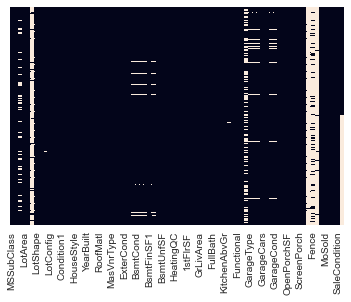

In [21]:
#checking for missing values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## Replacing incorrect values to nan

In [22]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
#df

In [23]:
#The garage year built is greater is older than the built year of house, which cannot be possible 
df.replace(df['GarageYrBlt'].values[2592],np.NaN,inplace=True)
df.replace(df['GarageYrBlt'].values[2549],np.NaN,inplace=True)

In [24]:
#2592
#print(df['GarageYrBlt'].values[2592])

## Checking Missing Percent

In [25]:
#checking missing values
#pd.set_option('display.max_rows')

null_values=df.isnull().sum().values
l=df.shape[0]
percent=[]

for i in null_values:
    percent.append((i/l)*100)

d={'Columns':df.columns,'Missing_Count':null_values, 'Missing_Percent':percent}
data=pd.DataFrame(data=d)
data=data[data.Missing_Count>0]
data=data.sort_values(by="Missing_Percent",ascending=False)
style = data.style.set_properties(**{'text-align':'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
style

,Columns,Missing_Count,Missing_Percent
71,PoolQC,2909,99.657417
73,MiscFeature,2814,96.402878
5,Alley,2721,93.216855
72,Fence,2348,80.438506
79,SalePrice,1459,49.982871
56,FireplaceQu,1420,48.646797
2,LotFrontage,486,16.649538
58,GarageYrBlt,221,7.571086
63,GarageCond,159,5.447071
59,GarageFinish,159,5.447071


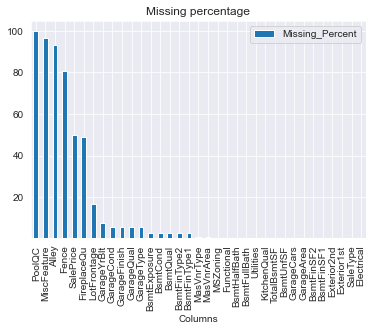

In [26]:
data.plot.bar(x="Columns", y="Missing_Percent", title="Missing percentage",bottom=0.1)
plt.show()

## Dropping columns with missing values > 75% 

In [27]:
# Dropping columns with missing_percent>75
#data=data.drop(['SalePrice'],axis=0)
while True:
    if data.iloc[0:len(data),2].values[0]>75:
        df=df.drop([data.iloc[0:len(data),0].values[0]],axis='columns')
        data.drop(index=data.index[0], axis=0, inplace=True)
    else:
        break

In [28]:
data = data.iloc[1: , :]
data

,Columns,Missing_Count,Missing_Percent
56,FireplaceQu,1420,48.646797
2,LotFrontage,486,16.649538
58,GarageYrBlt,221,7.571086
63,GarageCond,159,5.447071
59,GarageFinish,159,5.447071
62,GarageQual,159,5.447071
57,GarageType,157,5.378554
31,BsmtExposure,82,2.809181
30,BsmtCond,82,2.809181
29,BsmtQual,81,2.774923


## Filtering categorical and numerical values in missing values

In [29]:
train.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,7.932610
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,7.878263
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7.959618
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,7.774955
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8.002875
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,7.783469
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,8.081202
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,7.916361
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,7.744773
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851

In [30]:
missing_cate=[]
missing_num=[]

In [31]:
#Appending categorical values to missing_cate and non-cate values to missing_num inorder to handle categorical values

i=0
data_rows=data.iloc[0:len(data),0]
while i!=len(data):
    x=data_rows.values[i]
    if df.dtypes[x] == object:
        missing_cate.append(x)
    else:
        missing_num.append(x)
    i+=1


In [32]:
print(missing_cate,"\n",missing_num)

['FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType', 'Electrical'] 
 ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageCars', 'GarageArea', 'BsmtFinSF2', 'BsmtFinSF1']


## Filling Missing Values

In [33]:
#filling missing categorical values with mode of the column
for i in missing_cate:
    df[i].fillna(df[i].mode()[0], inplace=True)
    
#filling missing non-categorical values with mean of the column
for i in missing_num:
    df[i].fillna(df[i].mean(), inplace=True)

In [34]:
#df

In [35]:
#df["YrSold"] = df["YrSold"].astype(str)

<AxesSubplot:>

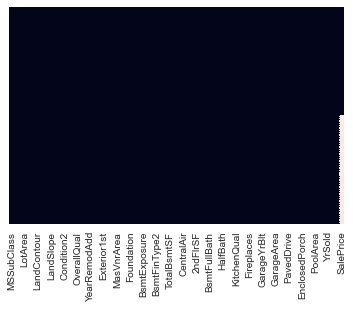

In [36]:
#checking for missing values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Feature Engineering

In [37]:
df.loc[df['YearRemodAdd'] ==0, 'YearRemodAdd'] = df['YearBuilt']

df['age'] = df['YrSold']-df['YearRemodAdd']

df['Garage_age'] =  df['YrSold']-df['GarageYrBlt']


# Correlationship

In [38]:
correlation = df.corr()['SalePrice']
correlation

MSSubClass      -0.072481
LotFrontage      0.334042
LotArea          0.255397
OverallQual      0.815044
OverallCond     -0.032282
YearBuilt        0.588037
YearRemodAdd     0.566884
MasVnrArea       0.424118
BsmtFinSF1       0.369564
BsmtFinSF2       0.006244
BsmtUnfSF        0.221045
TotalBsmtSF      0.609149
1stFlrSF         0.593533
2ndFlrSF         0.317707
LowQualFinSF    -0.038494
GrLivArea        0.697018
BsmtFullBath     0.235705
BsmtHalfBath    -0.003649
FullBath         0.594022
HalfBath         0.314675
BedroomAbvGr     0.211745
KitchenAbvGr    -0.147274
TotRmsAbvGrd     0.532020
Fireplaces       0.488518
GarageYrBlt      0.475276
GarageCars       0.680203
GarageArea       0.649638
WoodDeckSF       0.333121
OpenPorchSF      0.318872
EnclosedPorch   -0.149878
3SsnPorch        0.055339
ScreenPorch      0.121459
PoolArea         0.068403
MiscVal         -0.019930
MoSold           0.057452
YrSold          -0.037891
SalePrice        1.000000
age             -0.569453
Garage_age  

In [39]:
df = df.drop(columns = ['GarageYrBlt','YrSold','YearBuilt','SalePrice','YearRemodAdd'],axis = 1)

# Data Transformation

In [40]:
#cate=['OverallQual','OverallCond','HalfBath','GarageCars','Fireplaces','TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr',
#        'HalfBath','FullBath','BsmtHalfBath','BsmtFullBath']
i=0
while i<df.shape[1]:
    x=df.columns[i]
    #df[x] = scaler.fit_transform(df[[x]])
    if df[x].dtypes!=object and abs(df[x]).skew() >0.5:
        #df[x] = boxcox1p(df[x],boxcox_normmax(df[x]+1))
        df[x]=stats.boxcox(df[x]+1)[0]
        #df[x] = np.log1p(df[x])
    i+=1


# Encoding Categorical values

In [41]:
#Finding ctegorical values from df
categorical=[]
for i in df:
    if df.dtypes[i] == object:
        
        categorical.append(i)
print(categorical)
        

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [42]:
#convert categorical to numerical

label_encoder = preprocessing.LabelEncoder()

#for i in categorical:
df['MSZoning']= label_encoder.fit_transform(df['MSZoning'])


In [43]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,age,Garage_age
0,2.664197,3,15.967598,17.222846,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,3.009505,Gable,CompShg,VinylSd,VinylSd,BrkFace,2.961482,Gd,TA,PConc,Gd,TA,No,GLQ,15.065113,Unf,0.0,20.244818,213.393744,GasA,Ex,Y,SBrkr,5.493235,4.433494,0.0,7.108399,0.42882,0.000000,2,0.347183,3,0.427643,Gd,2.080035,Typ,0.000000,Gd,Attchd,RFn,2.0,548.0,TA,TA,Y,0.000000,4.308115,0.00000,0.0,0.0,0.0,0.0,2,WD,Normal,5,2.696969
1,2.192747,3,18.053783,17.639401,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,4.193354,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,16.552706,Unf,0.0,27.997998,286.218370,GasA,Ex,Y,SBrkr,5.742845,0.000000,0.0,6.831303,0.00000,0.042274,2,0.000000,3,0.427643,TA,1.853614,Typ,0.583447,TA,Attchd,RFn,2.0,460.0,TA,TA,Y,4.566662,0.000000,0.00000,0.0,0.0,0.0,0.0,5,WD,Normal,31,7.980528
2,2.664197,3,16.400996,18.166916,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,3.009505,Gable,CompShg,VinylSd,VinylSd,BrkFace,2.908403,Gd,TA,PConc,Gd,TA,Mn,GLQ,13.490633,Unf,0.0,34.596662,225.361168,GasA,Ex,Y,SBrkr,5.540057,4.439102,0.0,7.147981,0.42882,0.000000,2,0.347183,3,0.427643,Gd,1.853614,Typ,0.583447,TA,Attchd,RFn,2.0,608.0,TA,TA,Y,0.000000,3.911127,0.00000,0.0,0.0,0.0,0.0,9,WD,Normal,6,3.357506
3,2.722440,3,15.224624,17.622218,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,3.009505,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,10.499547,Unf,0.0,38.545941,194.239896,GasA,Gd,Y,SBrkr,5.568269,4.384063,0.0,7.112119,0.42882,0.000000,1,0.000000,3,0.427643,Gd,1.974276,Typ,0.583447,Gd,Detchd,Unf,3.0,642.0,TA,TA,Y,0.000000,3.719447,0.76876,0.0,0.0,0.0,0.0,2,WD,Abnorml,36,3.652368
4,2.664197,3,18.579309,18.976035,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,3.009505,Gable,CompShg,VinylSd,VinylSd,BrkFace,3.108887,Gd,TA,PConc,Gd,TA,Av,GLQ,14.738148,Unf,0.0,36.739855,265.920176,GasA,Ex,Y,SBrkr,5.680851,4.516586,0.0,7.336633,0.42882,0.000000,2,0.347183,4,0.427643,Gd,2.174111,Typ,0.583447,TA,Attchd,RFn,3.0,836.0,TA,TA,Y,4.285706,4.652824,0.00000,0.0,0.0,0.0,0.0,12,WD,Normal,8,3.652368


In [44]:
df.shape

(2919, 73)

In [45]:
df = pd.get_dummies(df).reset_index(drop=True)
df.shape

(2919, 269)

In [46]:
df.head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,age,Garage_age,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,P

# Spliting data

In [47]:
X = df.iloc[:len(y), :]
test = df.iloc[len(y):, :]

In [49]:
X.shape , test.shape, y.shape

((1460, 269), (1459, 269), (1460,))

In [50]:
#Split Data for Training and Testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
#from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


# Training

##  Metric Evaluation

In [51]:
rms=[]
mse=[]
mae=[]
r2=[]
def evaluation(model, x_test, y_test, rms , mse, mae, r2):
        pred = model.predict(x_test)
        
        rms.append(np.sqrt(mean_squared_error(y_test, pred)))
        mse.append(mean_squared_error(y_test, pred))
        mae.append(mean_absolute_error(y_test, pred))
        r2.append(r2_score(y_test,pred))
        
        print("Result\n","---------------------------------------------")
        print("\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred)))
        print("\nMean Squared Error: \t",mean_squared_error(y_test, pred))
        print("\nMean Absolute Error: \t",mean_absolute_error(y_test, pred))
        print("\nR2 Score: \t\t",r2_score(y_test,pred))

In [52]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.4946075988475276

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
model=regressor.fit(x_train, y_train)

#y_pred_test_Forestreg=model.predict(x_test)
model.score(x_test,y_test)

0.7939131162314993

In [54]:
evaluation(model, x_test, y_test,  rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.0703301703553051

Mean Squared Error: 	 0.004946332862206237

Mean Absolute Error: 	 0.03880783145285173

R2 Score: 		 0.7939131162314993


# KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=18)
x=knn.fit(x_train,y_train)

In [56]:
evaluation(x, x_test, y_test, rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.09322253607260549

Mean Squared Error: 	 0.00869044123180823

Mean Absolute Error: 	 0.06909841459225842

R2 Score: 		 0.6379164116266517


# SVR

In [57]:
from sklearn import svm

svr = svm.SVR()
model_svr=svr.fit(x_train, y_train)


In [58]:
evaluation(model_svr, x_test, y_test,  rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.08154467179330871

Mean Squared Error: 	 0.006649533497878438

Mean Absolute Error: 	 0.06252627208902889

R2 Score: 		 0.7229499762212146


# XGBOOST

In [59]:
import xgboost as xgb
xgb_regress = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)
l=xgb_regress.fit(x_train, y_train)

evaluation(l, x_test, y_test,  rms , mse, mae, r2)


Result
 ---------------------------------------------

Root Mean Squared Error:  0.051257055089208546

Mean Squared Error: 	 0.0026272856964181597

Mean Absolute Error: 	 0.03230945967949397

R2 Score: 		 0.8905352435778314


# ADABOOST

In [60]:
from sklearn import ensemble

regr = ensemble.AdaBoostRegressor(random_state=0, n_estimators=1000)
l=regr.fit(x_train, y_train)

In [61]:
evaluation(l, x_test, y_test,  rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.06896396227244583

Mean Squared Error: 	 0.004756028092315333

Mean Absolute Error: 	 0.0530700465556499

R2 Score: 		 0.8018420846381271


# GradientBoost

In [62]:
params = {
    "n_estimators": 1000,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.1
}

reg = ensemble.GradientBoostingRegressor(**params)
l=reg.fit(x_train, y_train)

In [63]:
evaluation(l, x_test, y_test,  rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.04942810103350073

Mean Squared Error: 	 0.002443137171777956

Mean Absolute Error: 	 0.03398502964027502

R2 Score: 		 0.8982077146085697


# RandomForest

In [64]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
r=regressor.fit(x_train, y_train) 

In [65]:
evaluation(r, x_test, y_test,  rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.05394573137845794

Mean Squared Error: 	 0.0029101419339567416

Mean Absolute Error: 	 0.03696946084269166

R2 Score: 		 0.8787501570960436


# CatBoost

In [66]:
import catboost as cb

#from sklearn.inspection import permutation_importance

model = cb.CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=8)
# Fit model
cat=model.fit(x_train, y_train)


0:	learn: 0.1493480	total: 167ms	remaining: 2m 46s
1:	learn: 0.1404617	total: 187ms	remaining: 1m 33s
2:	learn: 0.1326432	total: 207ms	remaining: 1m 8s
3:	learn: 0.1249758	total: 226ms	remaining: 56.3s
4:	learn: 0.1183172	total: 245ms	remaining: 48.7s
5:	learn: 0.1125798	total: 265ms	remaining: 43.9s
6:	learn: 0.1073468	total: 286ms	remaining: 40.6s
7:	learn: 0.1018173	total: 304ms	remaining: 37.7s
8:	learn: 0.0972322	total: 319ms	remaining: 35.2s
9:	learn: 0.0929331	total: 333ms	remaining: 32.9s
10:	learn: 0.0894323	total: 344ms	remaining: 30.9s
11:	learn: 0.0855525	total: 358ms	remaining: 29.5s
12:	learn: 0.0820156	total: 375ms	remaining: 28.5s
13:	learn: 0.0788386	total: 390ms	remaining: 27.5s
14:	learn: 0.0756009	total: 403ms	remaining: 26.5s
15:	learn: 0.0730286	total: 414ms	remaining: 25.5s
16:	learn: 0.0707613	total: 427ms	remaining: 24.7s
17:	learn: 0.0685509	total: 438ms	remaining: 23.9s
18:	learn: 0.0664708	total: 450ms	remaining: 23.2s
19:	learn: 0.0646189	total: 462ms	remai

In [67]:
evaluation(cat, x_test, y_test,  rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.04729808701467888

Mean Squared Error: 	 0.002237109035248135

Mean Absolute Error: 	 0.03222136676989126

R2 Score: 		 0.9067917904904188


In [68]:
df=pd.DataFrame()
df['Model']=["LR","KNN","SVM","XG","ADA","GRA","RF","CAT"]
df['RMSE']=rms
df['MSE']=mse
df['MAE']=mae
df['R2']=r2

df

,Model,RMSE,MSE,MAE,R2
0,LR,0.070330,0.004946,0.038808,0.793913
1,KNN,0.093223,0.008690,0.069098,0.637916
2,SVM,0.081545,0.006650,0.062526,0.722950
3,XG,0.051257,0.002627,0.032309,0.890535
4,ADA,0.068964,0.004756,0.053070,0.801842
5,GRA,0.049428,0.002443,0.033985,0.898208
6,RF,0.053946,0.002910,0.036969,0.878750
7,CAT,0.047298,0.002237,0.032221,0.906792


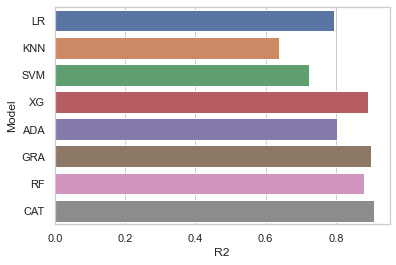

In [69]:
sns.set(style="whitegrid")
ax=sns.barplot(y='Model',x='R2',data=df)